In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [5]:
os.chdir("C:\\Users\\dell\\Desktop\\medical_data_linear")

In [6]:
os.getcwd()

'C:\\Users\\dell\\Desktop\\medical_data_linear'

In [7]:
insurance = pd.read_csv("insurance.csv")

In [8]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
pd.DataFrame(insurance).isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [10]:
pd.DataFrame(insurance).isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
print(len(insurance))

1338


In [14]:
print(len(insurance.columns))

7


In [15]:
print(insurance.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [16]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
features = insurance.iloc[:,0:5].columns.tolist()
features

['age', 'sex', 'bmi', 'children', 'smoker']

In [19]:
dependent = insurance.iloc[:,6].name
dependent

'charges'

In [20]:
from scipy.stats import pearsonr

In [24]:
# Finding correlation of charges with other variables to see how many variables are
    # strongly correlated with Profit
    
correlations = {}
for i in features:
    data = insurance[[i, dependent]]
    x1 = data.float[i].values
    x2 = data[dependent].values
    key = i + "Vs" + dependent
    correlations[key] = pearsonr(x1,x2)[0]

AttributeError: 'DataFrame' object has no attribute 'float'

In [28]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
#create the new dataframe abd assign the varibale to it
X = pd.DataFrame()
X['age'] = insurance['age']
X['sex'] = insurance['Sex']
X['bmi'] = insurance['bmi']
X['children'] = insurance['children']
X['smoker'] = insurance['smoker']
X['region'] = insurance['region']

In [29]:
print (insurance.sex[:5])
insurance['sex'] = pd.get_dummies(insurance.sex)['female']
print (insurance.sex[:5])

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object
0    1
1    0
2    0
3    0
4    0
Name: sex, dtype: uint8


In [30]:
print (insurance.sex[:5])
insurance['smoker'] = pd.get_dummies(insurance.smoker)['no']
print (insurance.smoker[:5])

0    1
1    0
2    0
3    0
4    0
Name: sex, dtype: uint8
0    0
1    1
2    1
3    1
4    1
Name: smoker, dtype: uint8


In [33]:
print (insurance.sex[:5])
insurance['region'] = pd.get_dummies(insurance.region)['southwest']
print (insurance.smoker[:5])

0    1
1    0
2    0
3    0
4    0
Name: sex, dtype: uint8
0    0
1    1
2    1
3    1
4    1
Name: smoker, dtype: uint8


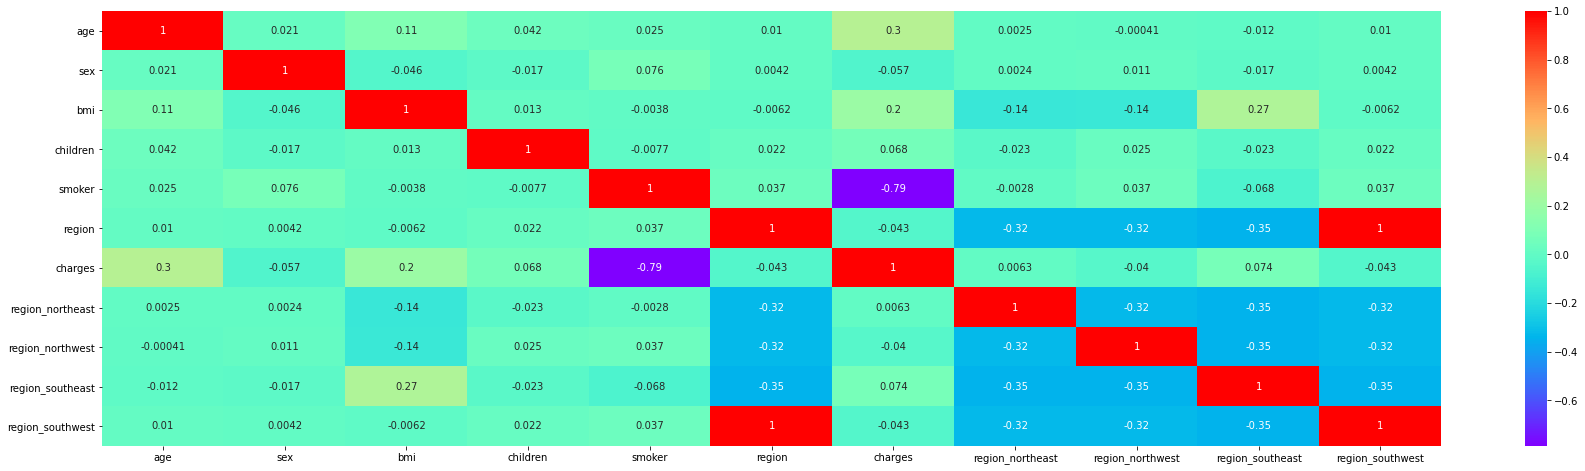

In [34]:
plt.figure(figsize=(30,8))
sns.heatmap(insurance.corr(), cmap='rainbow', annot=True)
plt.show()

# STEP 4 : EDA (EXploratory Data Analysis) or Data Visualisation

In [35]:
from scipy.stats import stats
from scipy.stats import norm, skew

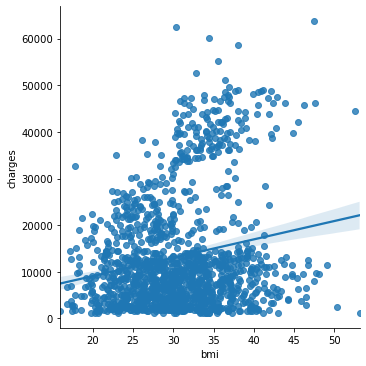

In [36]:
sns.lmplot(x='bmi', y='charges', data=insurance)

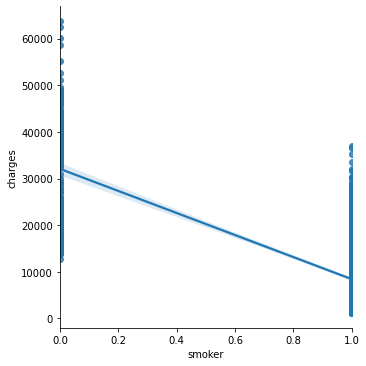

In [37]:
sns.lmplot(x='smoker', y='charges', data=insurance)

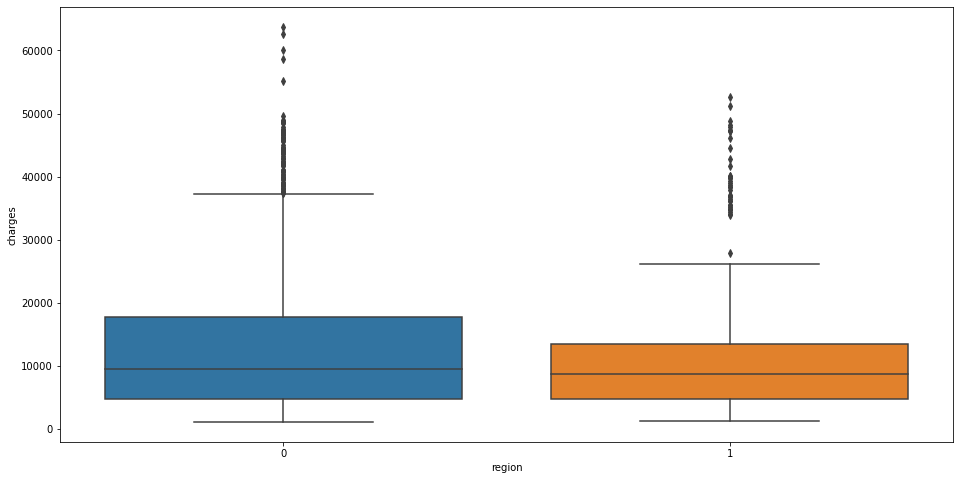

In [39]:
plt.figure(figsize = (16,8))
sns.boxplot(x='region', y='charges', data = insurance)
plt.show()

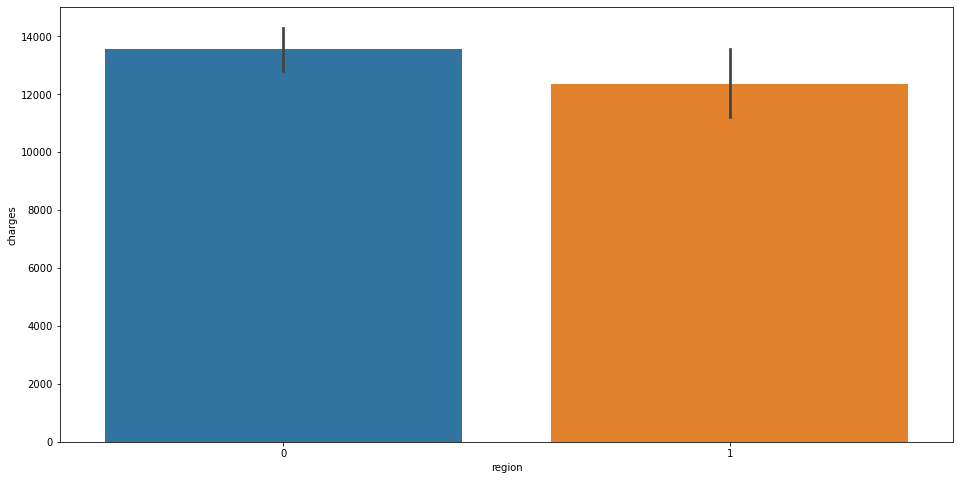

In [40]:
plt.figure(figsize = (16,8))
sns.barplot(x='region', y='charges', data = insurance)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


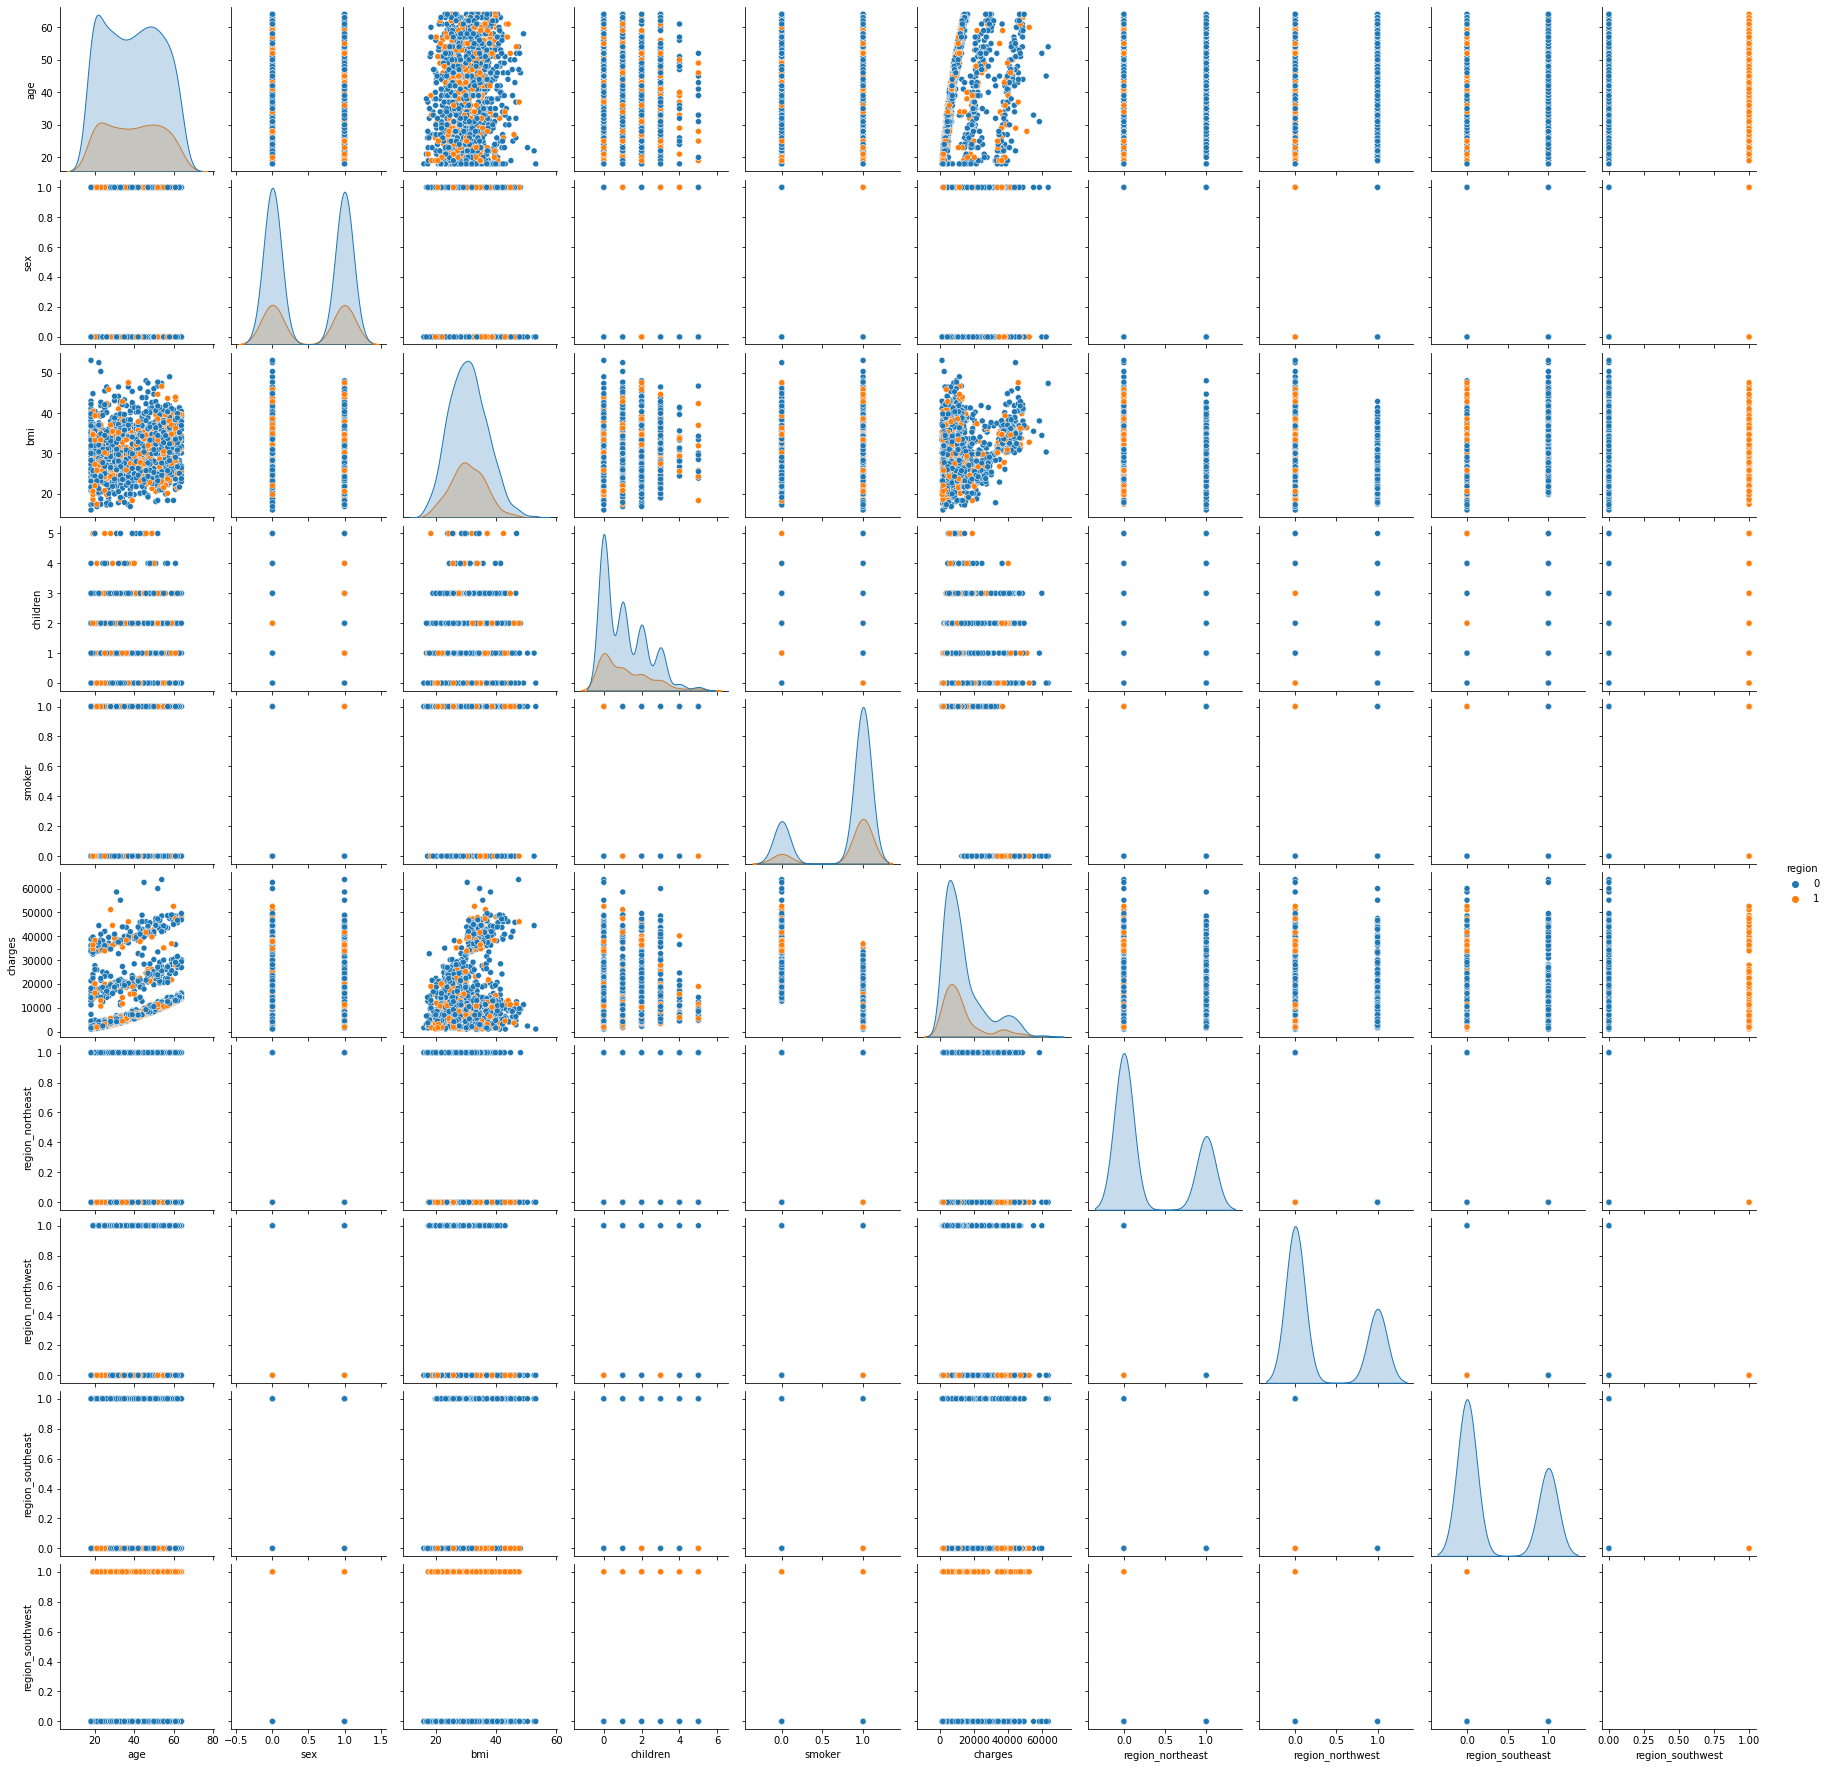

In [42]:
sns.pairplot(insurance, hue='region')

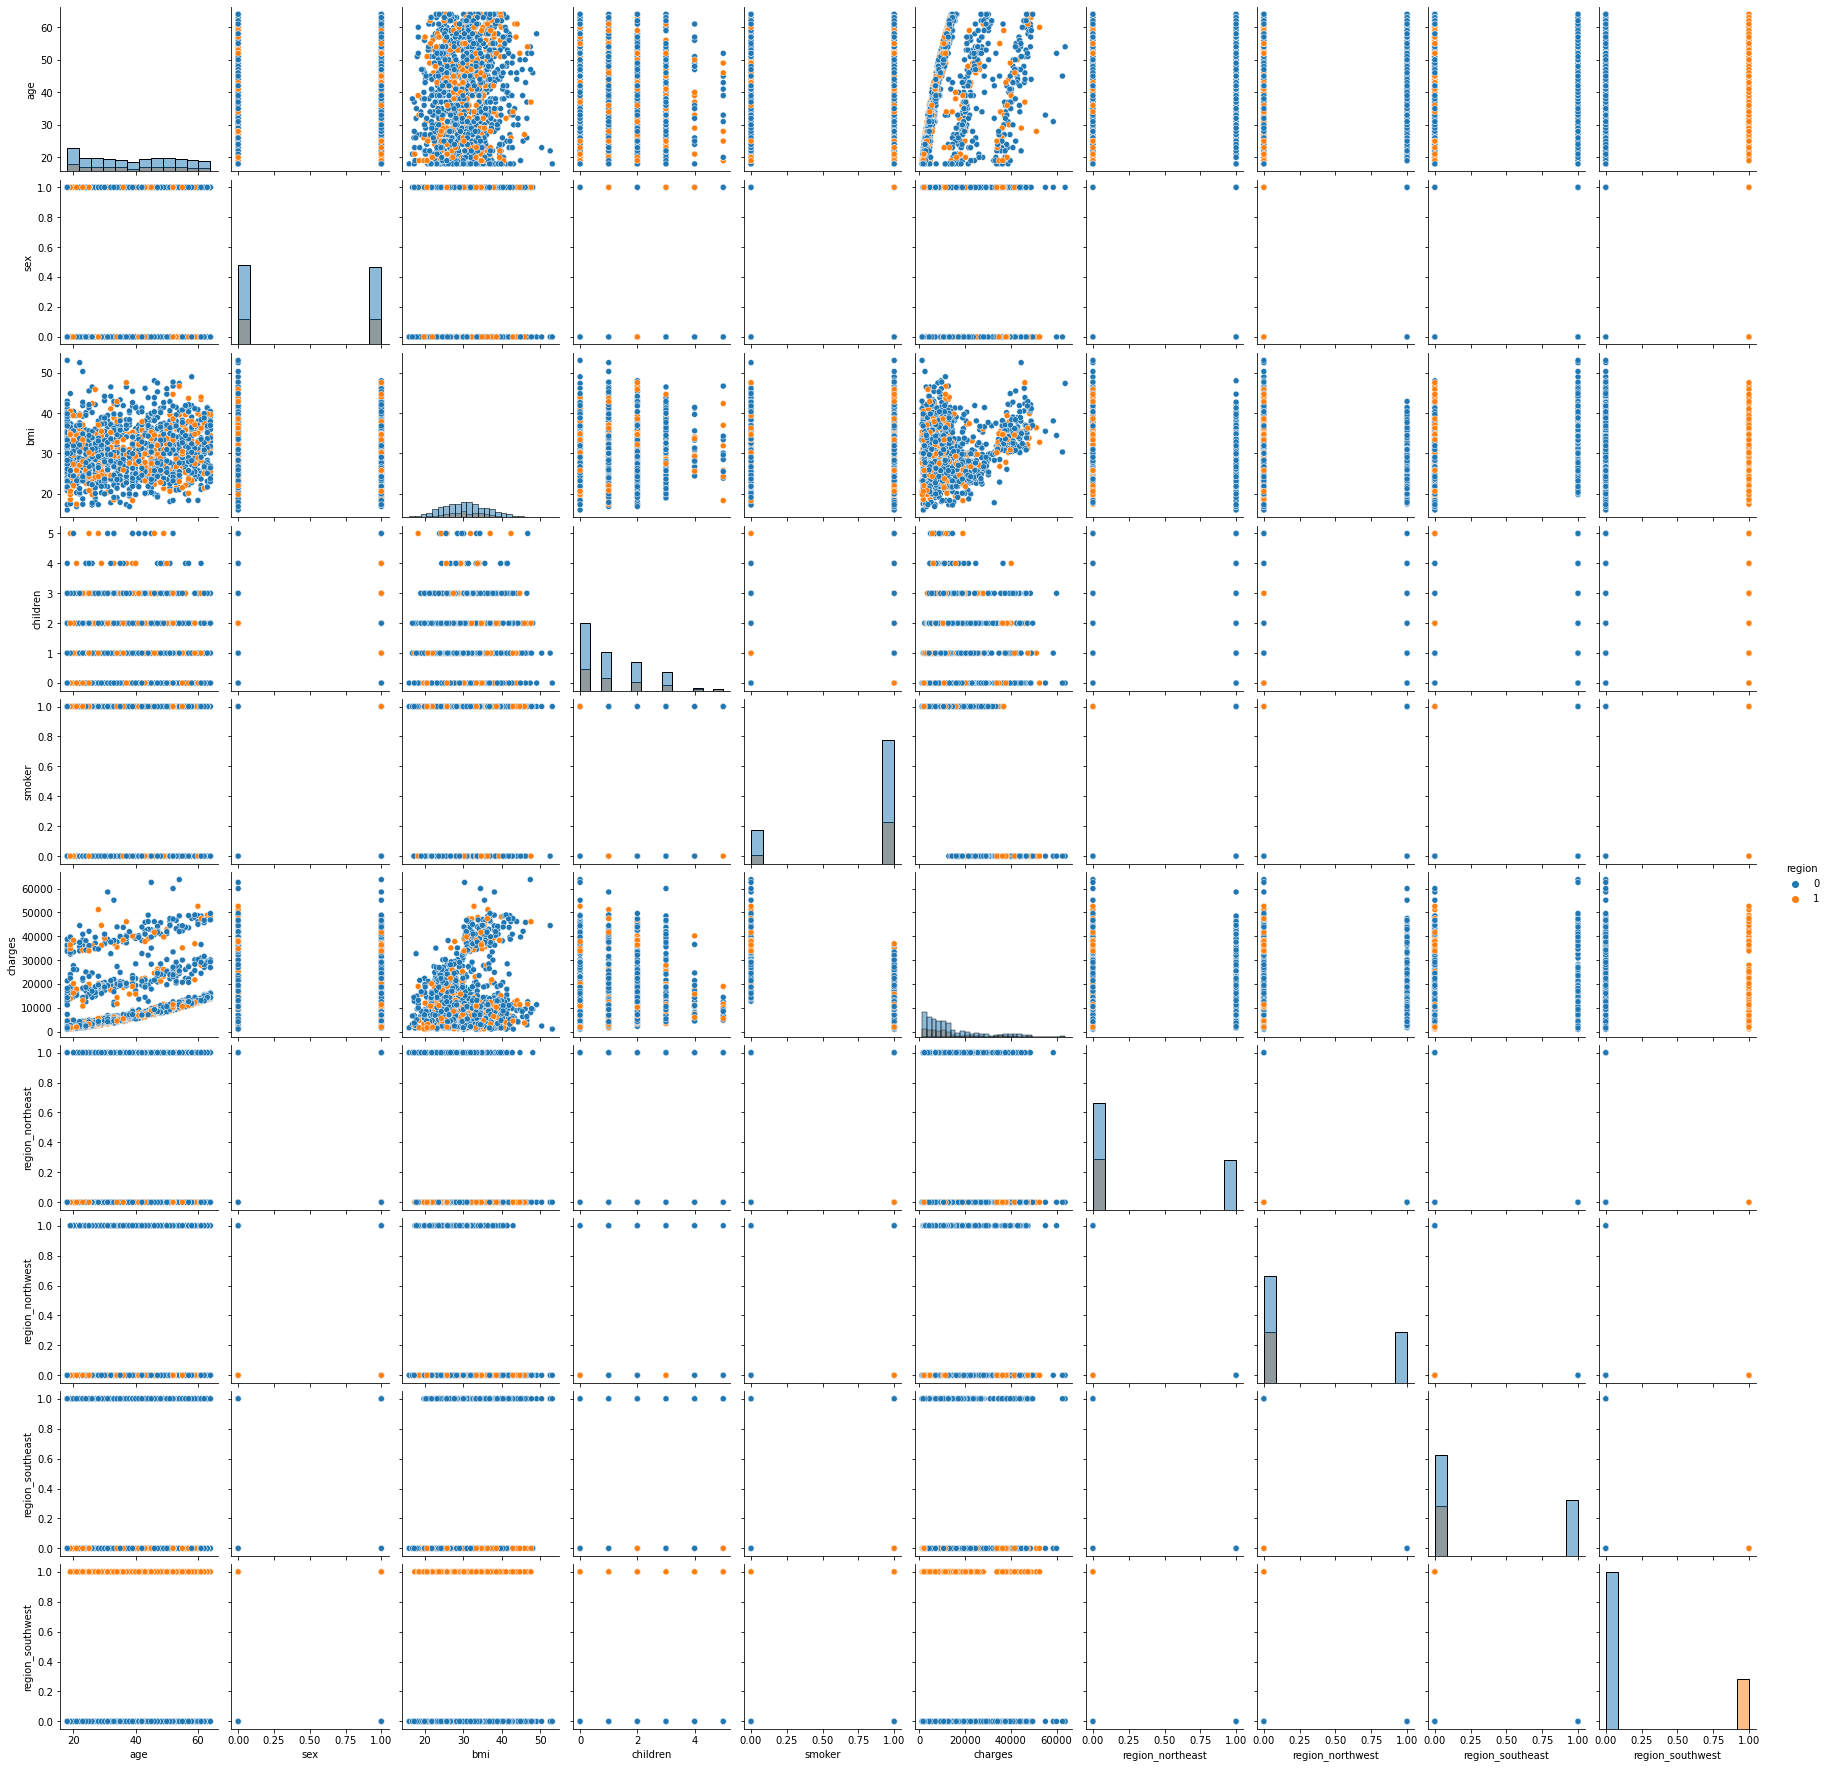

In [45]:
sns.pairplot(insurance, hue='region', diag_kind='hist')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'charges Distribution')

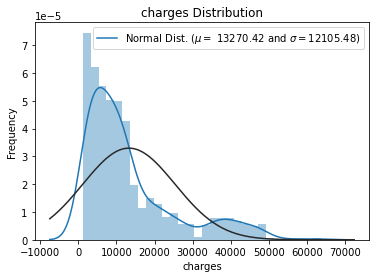

In [47]:
# it's little complex but hope you understand
sns.distplot(insurance['charges'], fit=norm);

# fitted with some parameter by using mu and sigma

(mu, sigma) = norm.fit(insurance['charges'])

plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu, sigma)],
          loc='best')
plt.ylabel('Frequency')
plt.title("charges Distribution")



In [48]:
x = insurance.iloc[:,0:5].values
insurance.head()
x

array([[19.  ,  1.  , 27.9 ,  0.  ,  0.  ],
       [18.  ,  0.  , 33.77,  1.  ,  1.  ],
       [28.  ,  0.  , 33.  ,  3.  ,  1.  ],
       ...,
       [18.  ,  1.  , 36.85,  0.  ,  1.  ],
       [21.  ,  1.  , 25.8 ,  0.  ,  1.  ],
       [61.  ,  1.  , 29.07,  0.  ,  0.  ]])

In [49]:
y = insurance.iloc[:,6].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [52]:
labelencoder = LabelEncoder()
x[:,1] = labelencoder.fit_transform(x[:,1])

In [53]:
from sklearn.compose import ColumnTransformer

In [54]:
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto',),[3])],  
                       remainder='passthrough')

# in default categories = auto
onehot_x= np.array(ct.fit_transform(x), dtype=np.str)
# or the code in next line.


In [ ]:

#STEP 6 : Spliting the data into training and test set


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=101)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 5)
(335, 5)
(1003,)
(335,)


In [ ]:
#Applying Machine Learning Model
#decision treemodel

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
from sklearn.metrics import explained_variance_score
from time import time
# Model Building
start = time()
decision = DecisionTreeRegressor()
decision.fit(x_train, y_train)
decc = decision.score(x_test,y_test)

# Prediction
decpredict = decision.predict(x_test)


# explained_variance_score - comparing pred vs actual
# confusion_matrix - comparing actual vs pred

# Score / Accuracy
exp_dec = explained_variance_score(decpredict, y_test)
end = time()
train_time_dec = end-start

In [60]:
exp_dec

0.6118068605751164

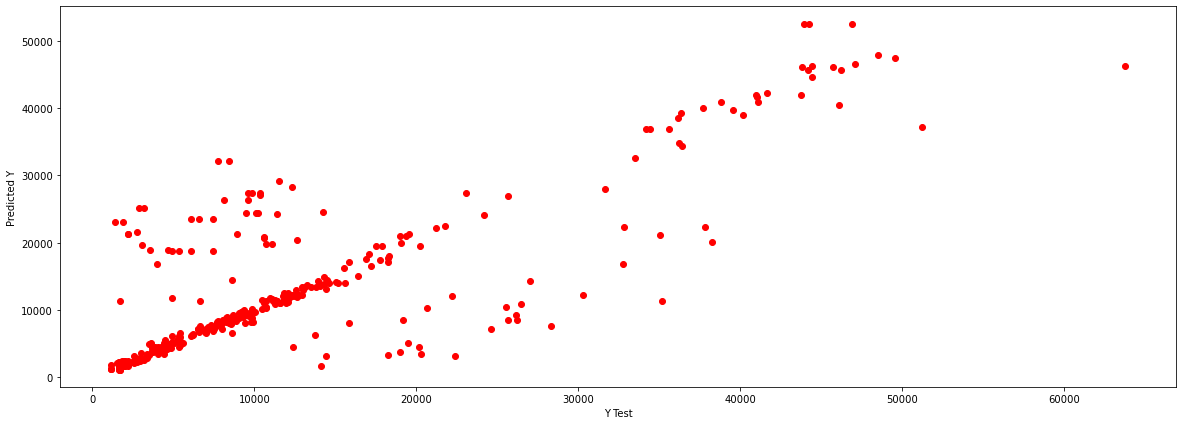

In [61]:
plt.figure(figsize=(20,7))
plt.scatter(y_test,decpredict, c = 'red')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

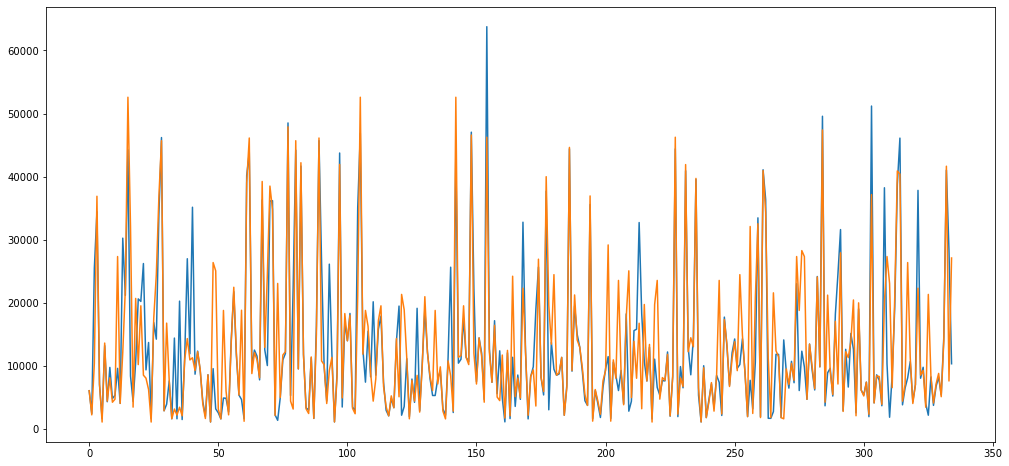

In [62]:
plt.figure(figsize=(17,8))
plt.plot(y_test, label = "Test")
plt.plot(decpredict, label = "predict")
plt.show()

In [64]:
#random forest
from sklearn.ensemble import RandomForestRegressor
start = time()
rand_regr = RandomForestRegressor(n_estimators = 400, random_state=0)
rand_regr.fit(x_train, y_train)
random = rand_regr.score(x_test, y_test)
end = time()
train_test_rand = end - start
predict_rand = rand_regr.predict(x_test)
exp_rand = explained_variance_score(predict_rand , y_test)

In [65]:
exp_rand

0.768082134690164

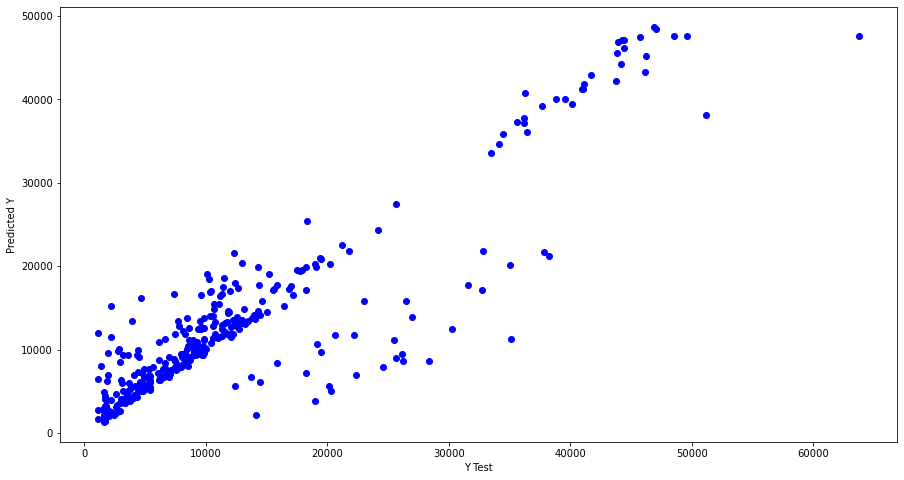

In [66]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predict_rand, c = 'blue')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

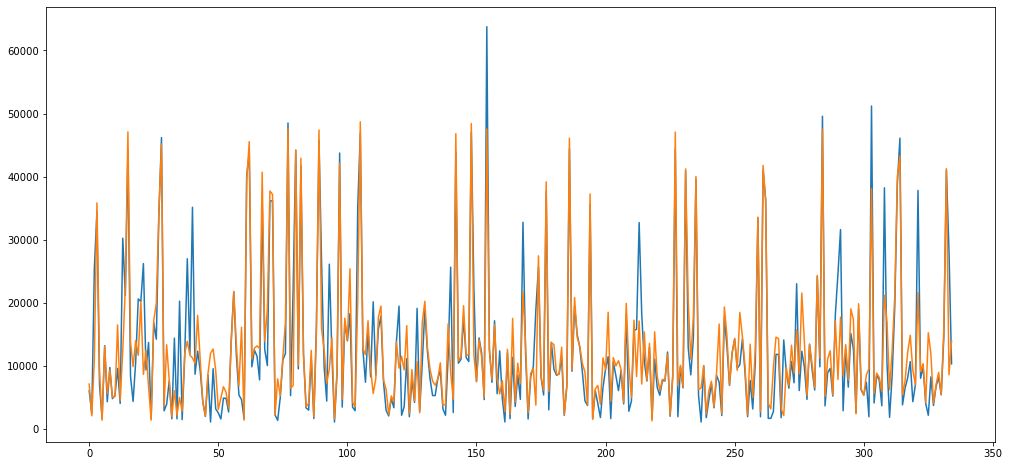

In [67]:
plt.figure(figsize=(17,8))
plt.plot(y_test, label = "Test")
plt.plot(predict_rand, label = "predict")
plt.show()

In [68]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
start = time()
est = GradientBoostingRegressor(n_estimators = 400, max_depth=5, loss='ls', min_samples_split=2, learning_rate=0.1).fit(x_train, y_train)
gradient = est.score(x_test, y_test)
# Loss function - MAE, MAPE, MSE, RME

end = time()
train_test_est = end - start
predict_est = est.predict(x_test)
exp_est = explained_variance_score(predict_est, y_test)

In [69]:
exp_est

0.7549270958295906

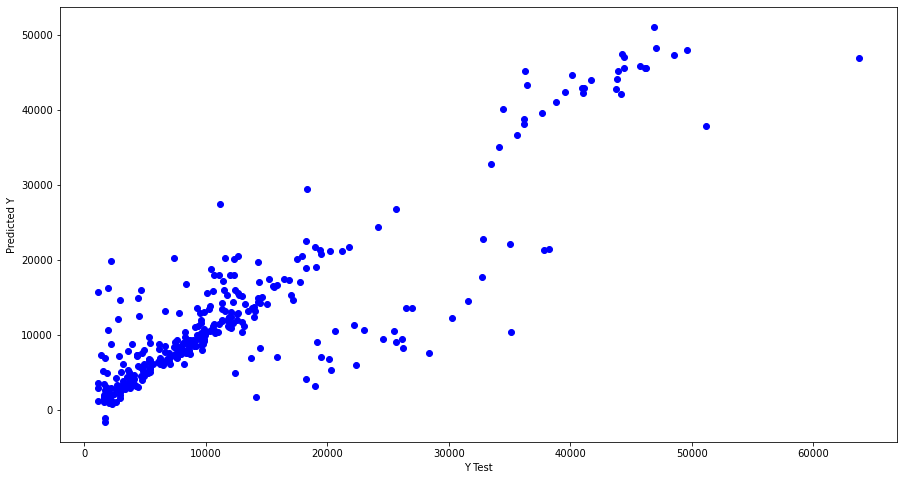

In [70]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predict_est, c = 'blue')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

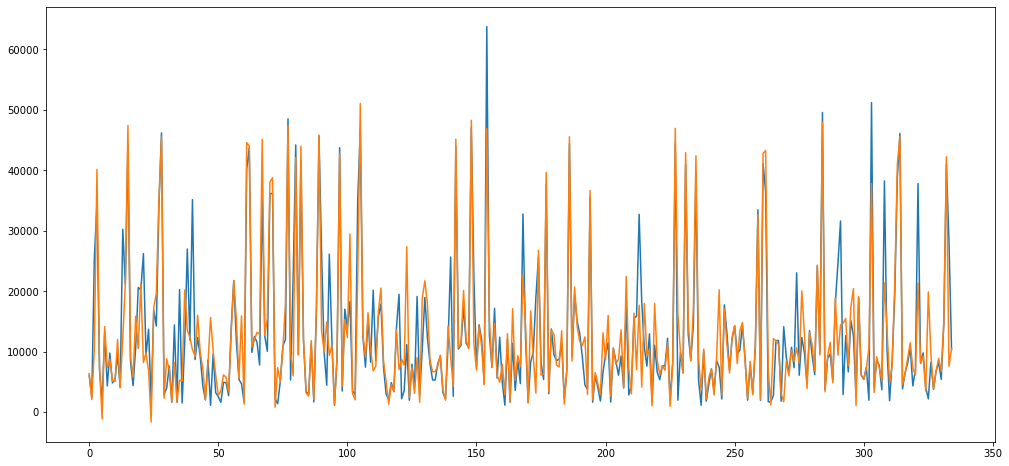

In [71]:
plt.figure(figsize=(17,8))
plt.plot(y_test, label = "Test")
plt.plot(predict_est, label = "predict")
plt.show()

In [72]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
start = time()
ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.2, loss='exponential').fit(x_train, y_train)
adab = ada.score(x_test, y_test)
# Loss function - MAE, MAPE, MSE, RME

end = time()
train_test_ada = end - start
predict_ada = ada.predict(x_test)
exp_ada = explained_variance_score(predict_ada, y_test)

In [73]:
exp_ada 

0.7323251987961836

In [74]:
#svm
from sklearn.svm import SVR
start = time()
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
end = time()
train_time_svr = end-start
svr1 = svr.score(x_test, y_test)
prediction_svr = svr.predict(x_test)
exp_svr = explained_variance_score(prediction_svr, y_test)


In [75]:
exp_svr

-7.758649343952317

In [76]:
#linear regression
from sklearn.linear_model import LinearRegression
start = time()
regressor = LinearRegression()
regressor.fit(x_train, y_train)
end = time()
train_time_linear = end-start
regressor1 = regressor.score(x_test, y_test)
prediction_linear = regressor.predict(x_test)
exp_linear = explained_variance_score(prediction_linear, y_test)

In [77]:
exp_linear

0.6346489654452998

In [78]:
#Model Comparision:
#Model Comparision on the basis of Model's Accuracy Score and Explained Variance score of different models

In [79]:
model_validation = pd.DataFrame({
    'Model':['Decision Tree','Random Forest','Gradiant Boosting','AdaBoost',
            'Support Vector Machine','Linear Regression'],
    'Score': [decc,random,gradient,adab,svr1,regressor1],
    'Variance Score': [exp_dec,exp_rand,exp_est,exp_ada,exp_svr,exp_linear]
    
    
})


model_validation.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
1,Random Forest,0.808831,0.768082
2,Gradiant Boosting,0.779799,0.754927
3,AdaBoost,0.769755,0.732325
5,Linear Regression,0.755626,0.634649
0,Decision Tree,0.619856,0.611807
4,Support Vector Machine,-0.085071,-7.758649


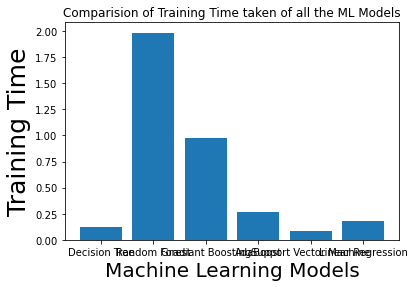

In [80]:
#Analysing training time for each model has taken
Model = ['Decision Tree','Random Forest','Gradiant Boosting','AdaBoost',
            'Support Vector Machine','Linear Regression']
Train_time = [
    train_time_dec,
    train_test_rand,
    train_test_est,
    train_test_ada,
    train_time_svr,
    train_time_linear    
]

index = np.arange(len(Model))
plt.bar(index, Train_time)
plt.xlabel("Machine Learning Models", fontsize =20)
plt.ylabel("Training Time", fontsize = 25)
plt.xticks(index, Model, fontsize=10)
plt.title("Comparision of Training Time taken of all the ML Models")
plt.show()

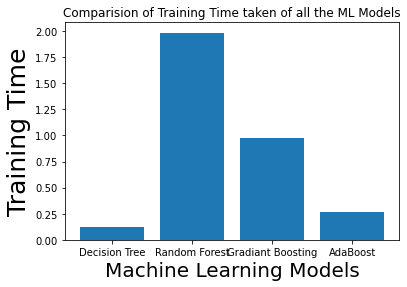

In [81]:
Model = ['Decision Tree','Random Forest','Gradiant Boosting','AdaBoost']
            
Train_time = [
    train_time_dec,
    train_test_rand,
    train_test_est,
    train_test_ada,
  
]

index = np.arange(len(Model))
plt.bar(index, Train_time)
plt.xlabel("Machine Learning Models", fontsize =20)
plt.ylabel("Training Time", fontsize = 25)
plt.xticks(index, Model, fontsize=10)
plt.title("Comparision of Training Time taken of all the ML Models")
plt.show()

In [82]:
#k-fold,cross-validation

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = est, X = x_train, y=y_train, cv = 10)
accuracy

array([0.83095841, 0.7332658 , 0.82847789, 0.76310879, 0.81965128,
       0.83593233, 0.81410273, 0.75009209, 0.80791887, 0.76043073])

In [ ]:
#so here k fold gives us 83% of score highest and random_forest is giving 80% so we reached our benchmark hence satisfied.